### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).


In [45]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import keras
import seaborn as sns; 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

In [46]:
data = fetch_openml('Fashion-MNIST', as_frame=False, parser='auto')

In [47]:
list(data)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [48]:
print(data.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [49]:
data.data.shape

(70000, 784)

In [50]:
data.target.shape

(70000,)

In [51]:
X = data.data
y = to_categorical(data.target)

In [52]:
X[0].shape

(784,)

In [53]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

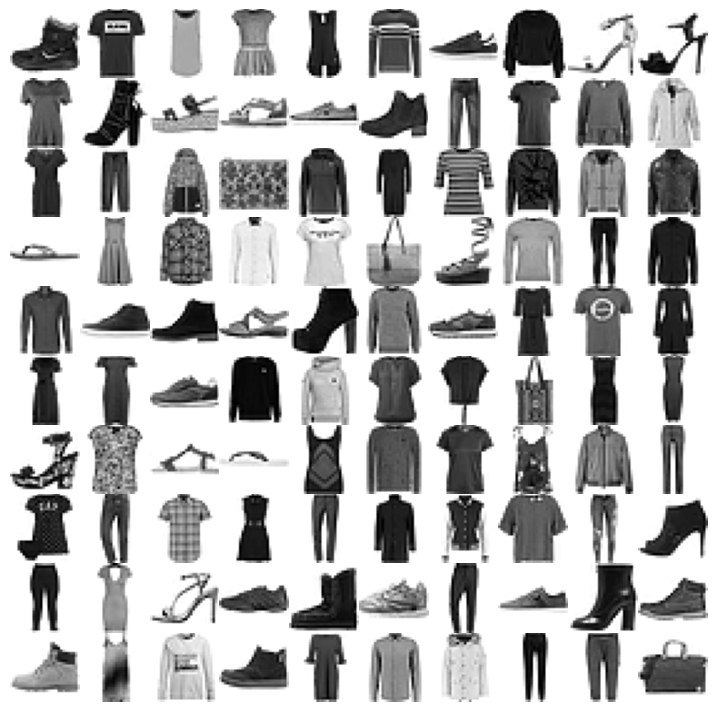

In [54]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### 2. Train a dense neural network using Keras

In [55]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [56]:
def make_model(model_params):
    model = Sequential()

    if len(model_params['layers']) == 0:
        model.add(Dense(model_params['output'], input_dim=model_params['input'], activation='softmax'))

    else:
        model.add(Dense(model_params['layers'][-1], input_dim=model_params['input'], activation='relu'))
        
        for i in range(len(model_params['layers']) - 1):
            model.add(Dense(i, activation='relu'))

        model.add(Dense(10, activation='softmax'))

    return model
        

In [71]:
def fit_model(model, epochs, batch_size, verbose):
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model, history

In [58]:

def one_hot_to_label(one_hot):
    label = list()

    for i in range(len(one_hot)):
        label.append(np.argmax(one_hot[i]))

    return label

In [59]:
def evaluate_model(y_test, y_pred, labels):
  y_pred = one_hot_to_label(y_pred)
  y_test = one_hot_to_label(y_test)
  cm = confusion_matrix(y_test, y_pred)
  cr = classification_report(y_test, y_pred)

  sns.heatmap(cm.T, square=True, annot=True, fmt='d', xticklabels = labels, yticklabels = labels)
  plt.xlabel('true label')
  plt.ylabel('predicted label')
  plt.show()
  print(cr)

In [75]:
def build_and_evaluate_model(model_params):
    model = make_model(model_params)
    model, history = fit_model(model,model_params['epochs'], model_params['batch_size'], model_params['verbose'] )
    y_pred = model.predict(X_test, verbose=0)
    evaluate_model(y_test, y_pred, model_params['labels'])

    plt.plot(history.history['loss'])
    plt.locator_params(axis="both", integer=True) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Test'], loc='upper left') 
    plt.show()

In [80]:
params = {
    'labels': ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],
    'epochs': 50,
    'batch_size': 128,
    'input': 784,
    'output': 10,
    'verbose': 0
}

[]


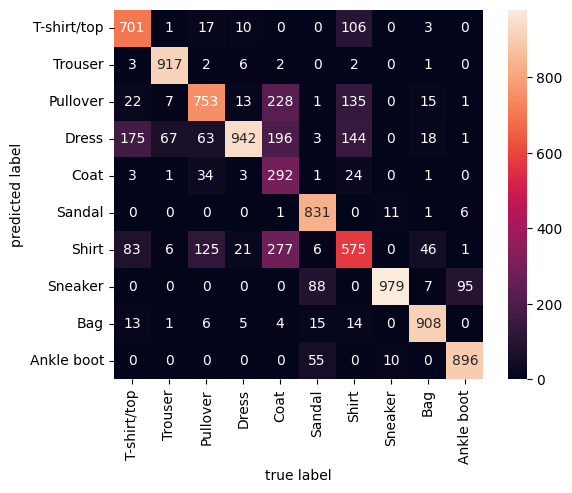

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1000
           1       0.98      0.92      0.95      1000
           2       0.64      0.75      0.69      1000
           3       0.59      0.94      0.72      1000
           4       0.81      0.29      0.43      1000
           5       0.98      0.83      0.90      1000
           6       0.50      0.57      0.54      1000
           7       0.84      0.98      0.90      1000
           8       0.94      0.91      0.92      1000
           9       0.93      0.90      0.91      1000

    accuracy                           0.78     10000
   macro avg       0.81      0.78      0.77     10000
weighted avg       0.81      0.78      0.77     10000



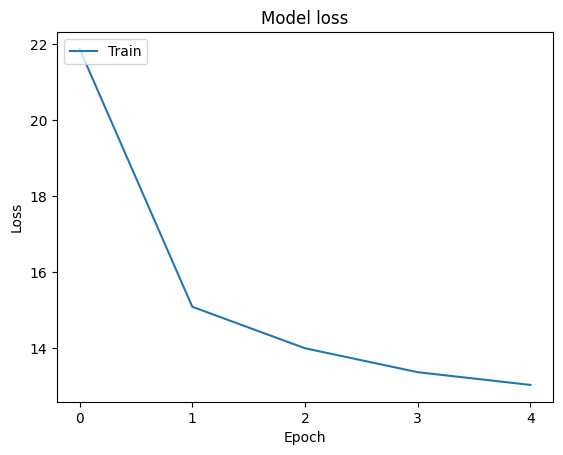

[25]


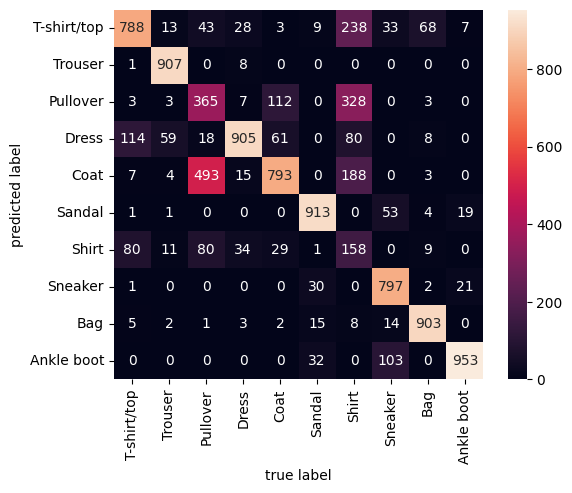

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1000
           1       0.99      0.91      0.95      1000
           2       0.44      0.36      0.40      1000
           3       0.73      0.91      0.81      1000
           4       0.53      0.79      0.63      1000
           5       0.92      0.91      0.92      1000
           6       0.39      0.16      0.23      1000
           7       0.94      0.80      0.86      1000
           8       0.95      0.90      0.92      1000
           9       0.88      0.95      0.91      1000

    accuracy                           0.75     10000
   macro avg       0.74      0.75      0.73     10000
weighted avg       0.74      0.75      0.73     10000



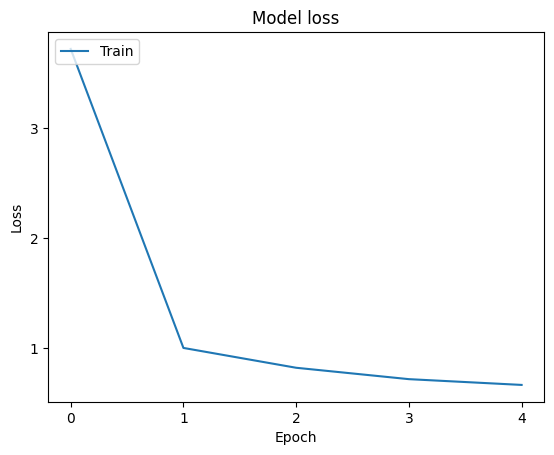

[50]


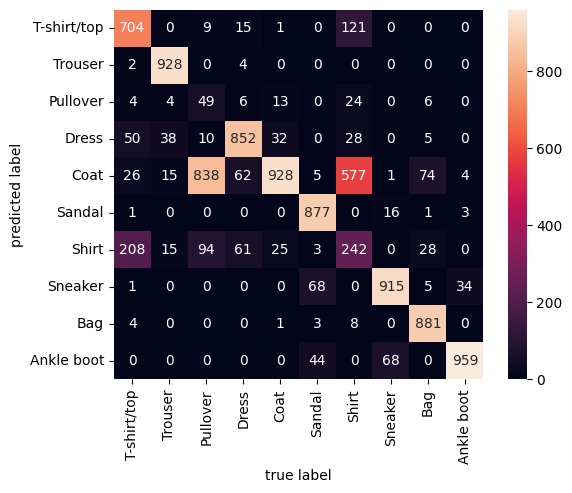

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1000
           1       0.99      0.93      0.96      1000
           2       0.46      0.05      0.09      1000
           3       0.84      0.85      0.85      1000
           4       0.37      0.93      0.53      1000
           5       0.98      0.88      0.92      1000
           6       0.36      0.24      0.29      1000
           7       0.89      0.92      0.90      1000
           8       0.98      0.88      0.93      1000
           9       0.90      0.96      0.93      1000

    accuracy                           0.73     10000
   macro avg       0.76      0.73      0.72     10000
weighted avg       0.76      0.73      0.72     10000



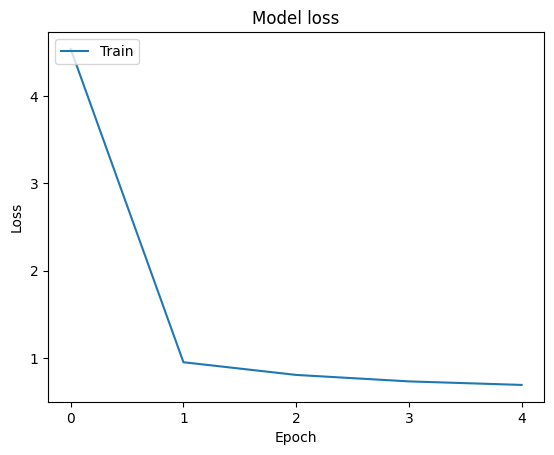

[100]


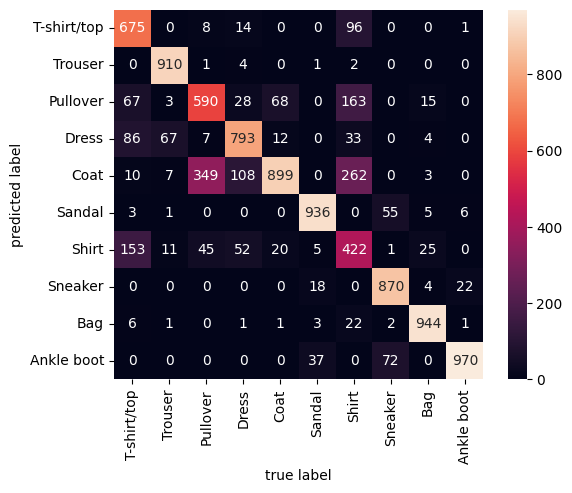

              precision    recall  f1-score   support

           0       0.85      0.68      0.75      1000
           1       0.99      0.91      0.95      1000
           2       0.63      0.59      0.61      1000
           3       0.79      0.79      0.79      1000
           4       0.55      0.90      0.68      1000
           5       0.93      0.94      0.93      1000
           6       0.57      0.42      0.49      1000
           7       0.95      0.87      0.91      1000
           8       0.96      0.94      0.95      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



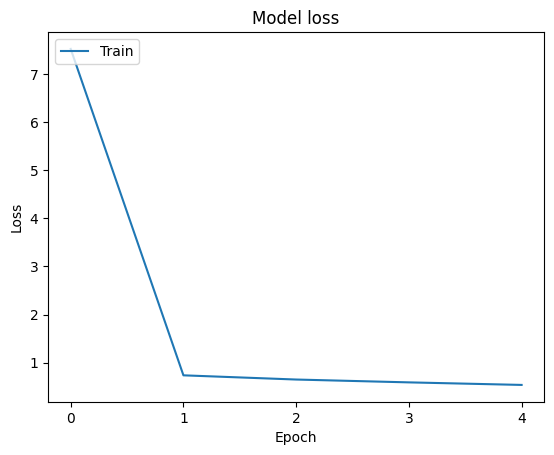

[128]


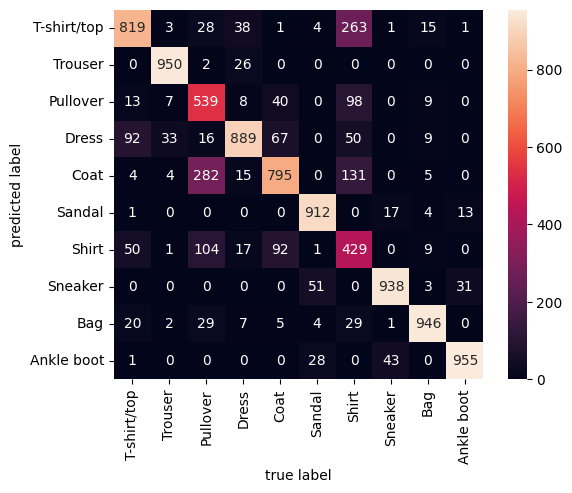

              precision    recall  f1-score   support

           0       0.70      0.82      0.75      1000
           1       0.97      0.95      0.96      1000
           2       0.75      0.54      0.63      1000
           3       0.77      0.89      0.82      1000
           4       0.64      0.80      0.71      1000
           5       0.96      0.91      0.94      1000
           6       0.61      0.43      0.50      1000
           7       0.92      0.94      0.93      1000
           8       0.91      0.95      0.93      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



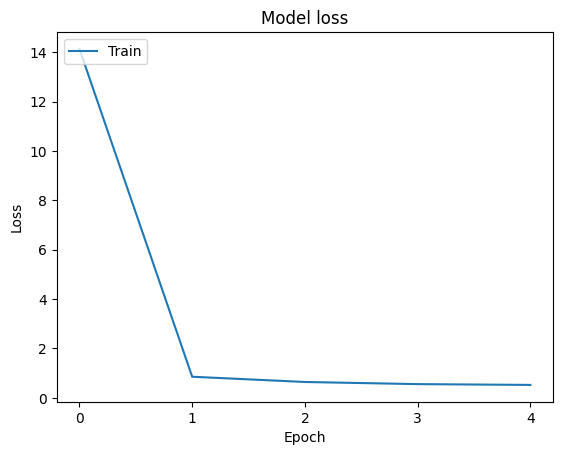

[200]


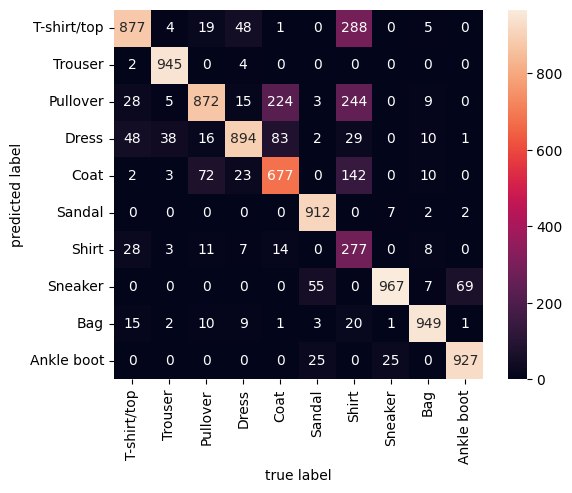

              precision    recall  f1-score   support

           0       0.71      0.88      0.78      1000
           1       0.99      0.94      0.97      1000
           2       0.62      0.87      0.73      1000
           3       0.80      0.89      0.84      1000
           4       0.73      0.68      0.70      1000
           5       0.99      0.91      0.95      1000
           6       0.80      0.28      0.41      1000
           7       0.88      0.97      0.92      1000
           8       0.94      0.95      0.94      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.82     10000
weighted avg       0.84      0.83      0.82     10000



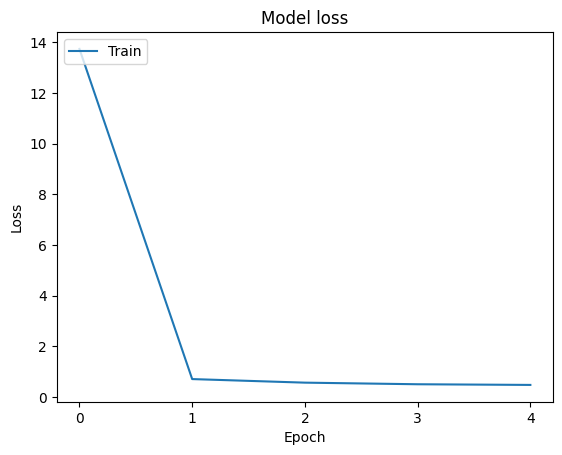

[400]


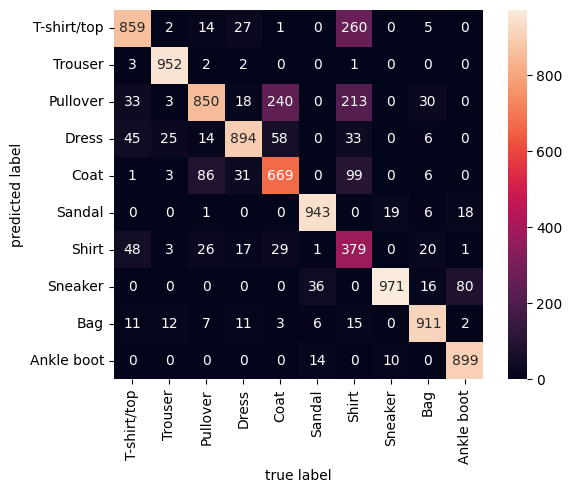

              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.61      0.85      0.71      1000
           3       0.83      0.89      0.86      1000
           4       0.75      0.67      0.71      1000
           5       0.96      0.94      0.95      1000
           6       0.72      0.38      0.50      1000
           7       0.88      0.97      0.92      1000
           8       0.93      0.91      0.92      1000
           9       0.97      0.90      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



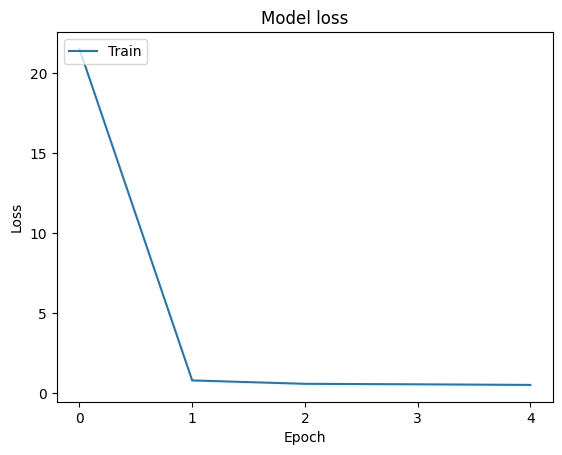

[600]


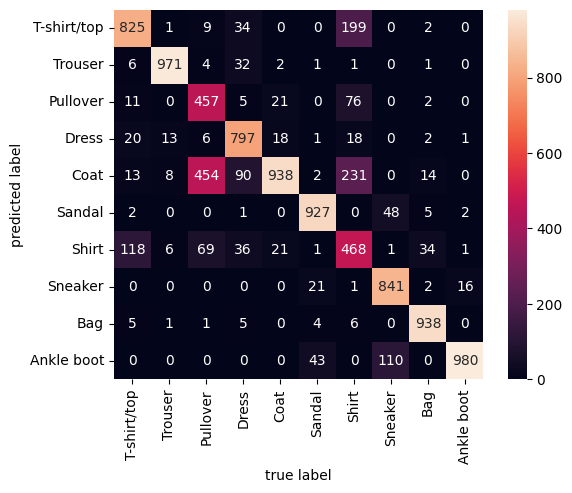

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1000
           1       0.95      0.97      0.96      1000
           2       0.80      0.46      0.58      1000
           3       0.91      0.80      0.85      1000
           4       0.54      0.94      0.68      1000
           5       0.94      0.93      0.93      1000
           6       0.62      0.47      0.53      1000
           7       0.95      0.84      0.89      1000
           8       0.98      0.94      0.96      1000
           9       0.86      0.98      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.83      0.81      0.81     10000
weighted avg       0.83      0.81      0.81     10000



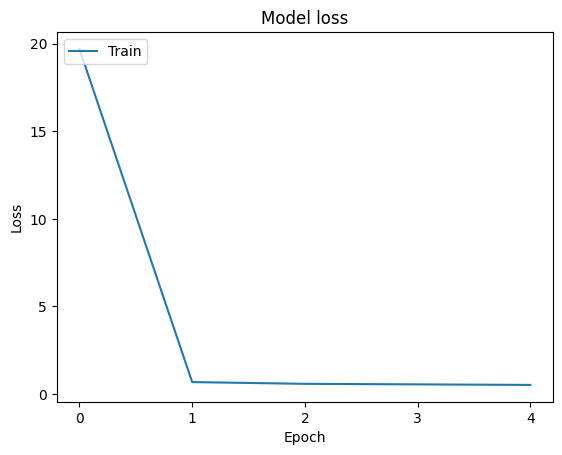

[800]


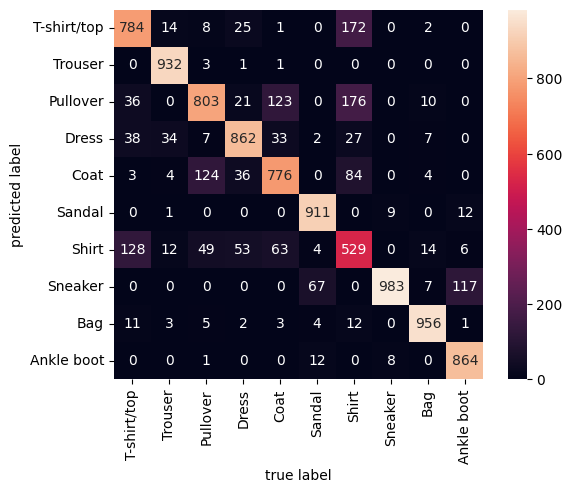

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.99      0.93      0.96      1000
           2       0.69      0.80      0.74      1000
           3       0.85      0.86      0.86      1000
           4       0.75      0.78      0.76      1000
           5       0.98      0.91      0.94      1000
           6       0.62      0.53      0.57      1000
           7       0.84      0.98      0.90      1000
           8       0.96      0.96      0.96      1000
           9       0.98      0.86      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



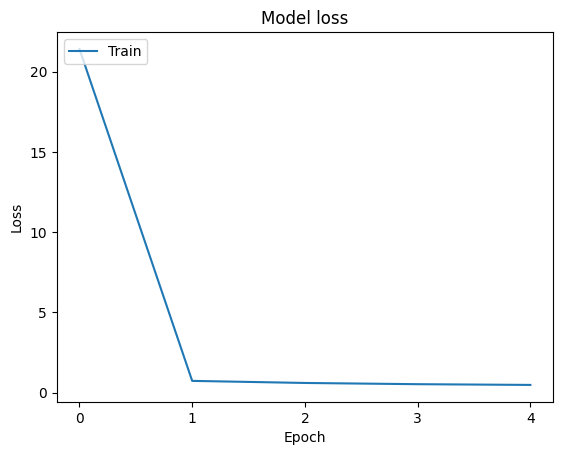

[1000]


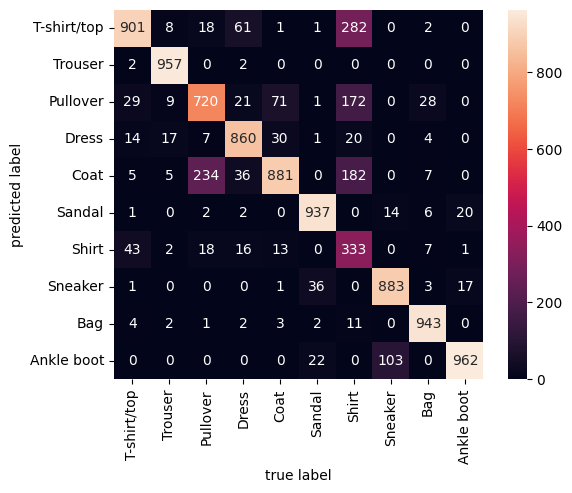

              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1000
           1       1.00      0.96      0.98      1000
           2       0.69      0.72      0.70      1000
           3       0.90      0.86      0.88      1000
           4       0.65      0.88      0.75      1000
           5       0.95      0.94      0.95      1000
           6       0.77      0.33      0.46      1000
           7       0.94      0.88      0.91      1000
           8       0.97      0.94      0.96      1000
           9       0.89      0.96      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.83     10000
weighted avg       0.85      0.84      0.83     10000



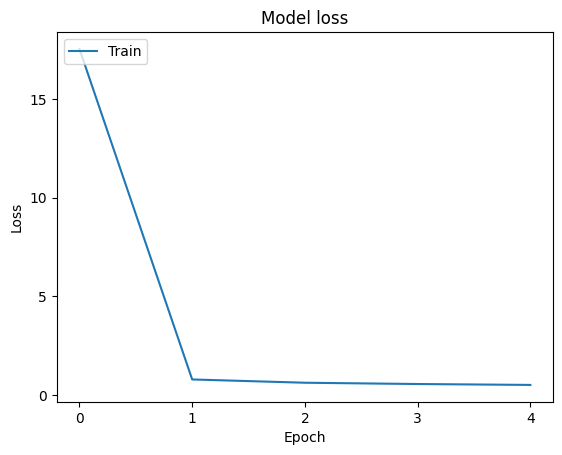

In [79]:
params = {
    'labels': ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],
    'epochs': 50,
    'batch_size': 128,
    'input': 784,
    'output': 10,
    'verbose': 0
}

models = [[],[25],[50],[100],[128],[200],[400],[600],[800],[1000]]

for model in models:
    params['layers'] = model
    print(model)
    build_and_evaluate_model(params)

[90]


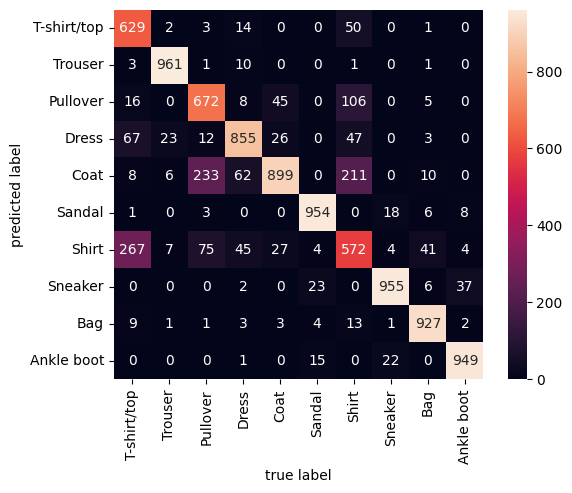

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.67      0.73      1000
           3       0.83      0.85      0.84      1000
           4       0.63      0.90      0.74      1000
           5       0.96      0.95      0.96      1000
           6       0.55      0.57      0.56      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.93      0.94      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



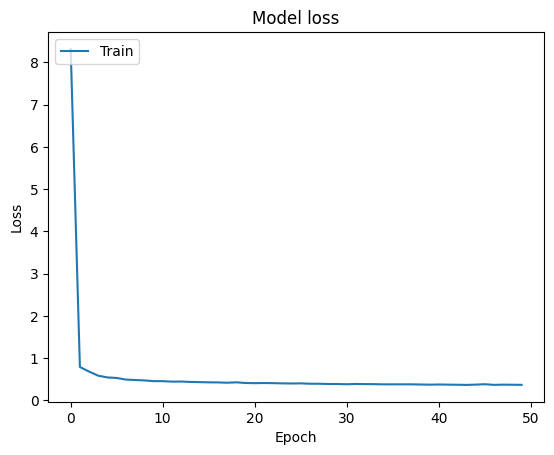

[100]


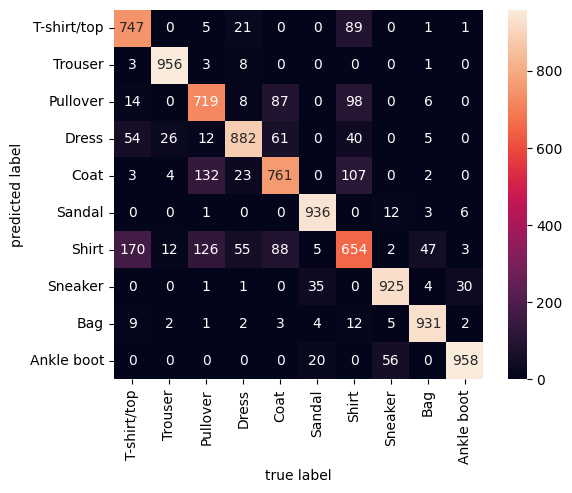

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.72      0.74      1000
           3       0.82      0.88      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.98      0.94      0.96      1000
           6       0.56      0.65      0.60      1000
           7       0.93      0.93      0.93      1000
           8       0.96      0.93      0.94      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



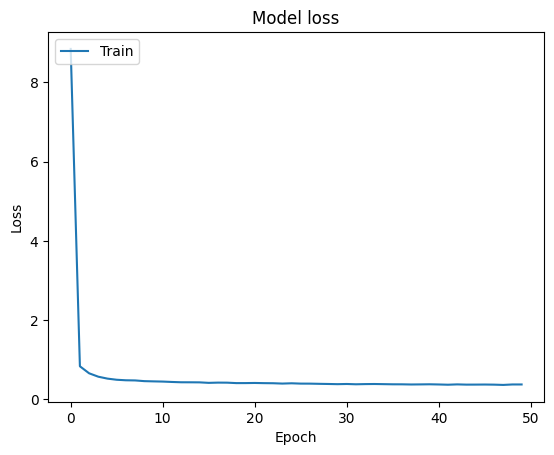

[110]


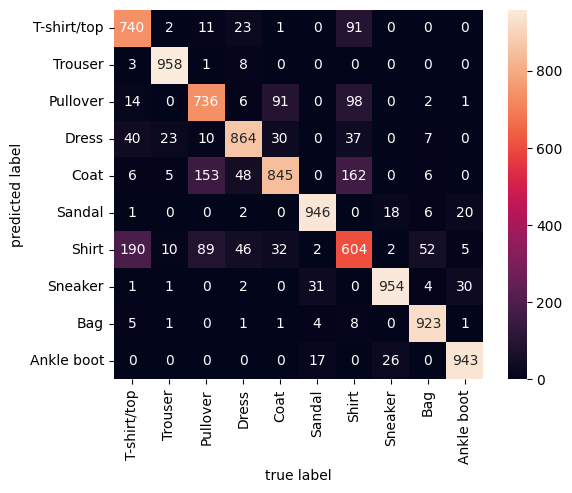

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1000
           1       0.99      0.96      0.97      1000
           2       0.78      0.74      0.76      1000
           3       0.85      0.86      0.86      1000
           4       0.69      0.84      0.76      1000
           5       0.95      0.95      0.95      1000
           6       0.59      0.60      0.59      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.92      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



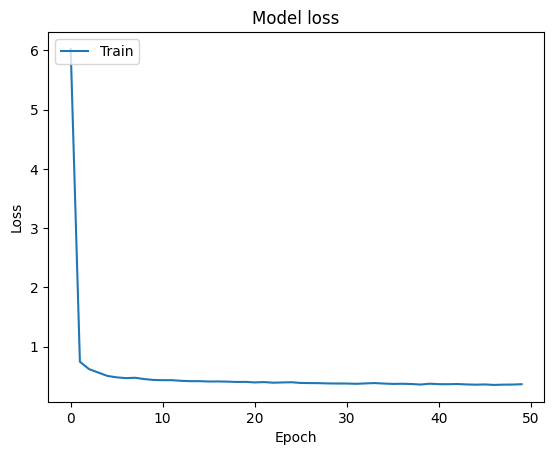

[120]


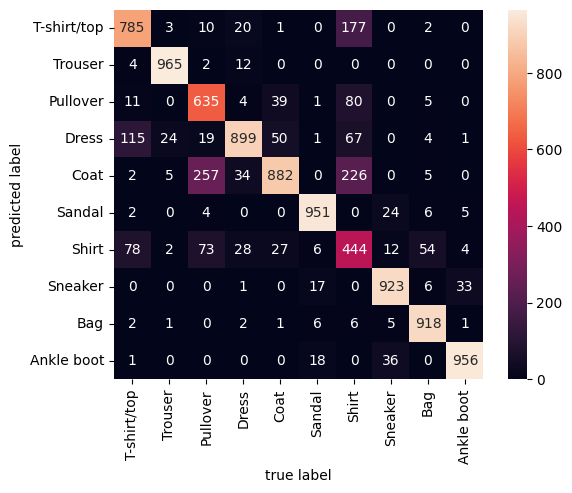

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.82      0.64      0.72      1000
           3       0.76      0.90      0.82      1000
           4       0.63      0.88      0.73      1000
           5       0.96      0.95      0.95      1000
           6       0.61      0.44      0.51      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.92      0.95      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



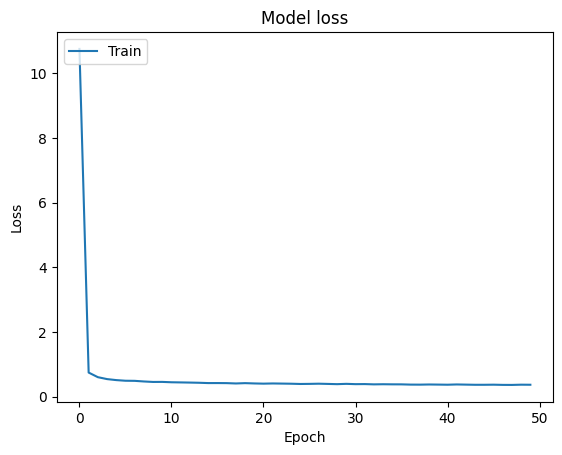

[128]


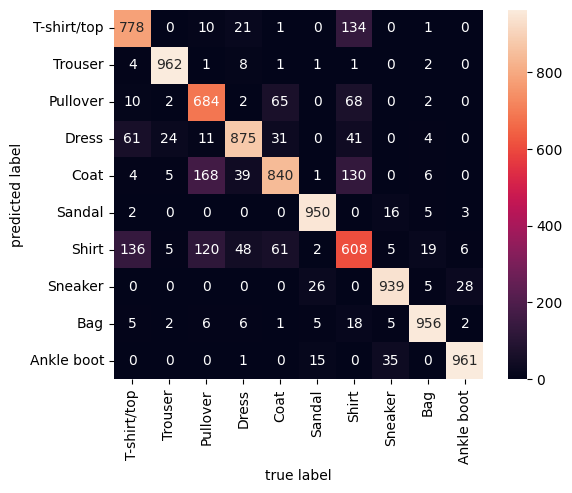

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.82      0.68      0.75      1000
           3       0.84      0.88      0.85      1000
           4       0.70      0.84      0.77      1000
           5       0.97      0.95      0.96      1000
           6       0.60      0.61      0.60      1000
           7       0.94      0.94      0.94      1000
           8       0.95      0.96      0.95      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



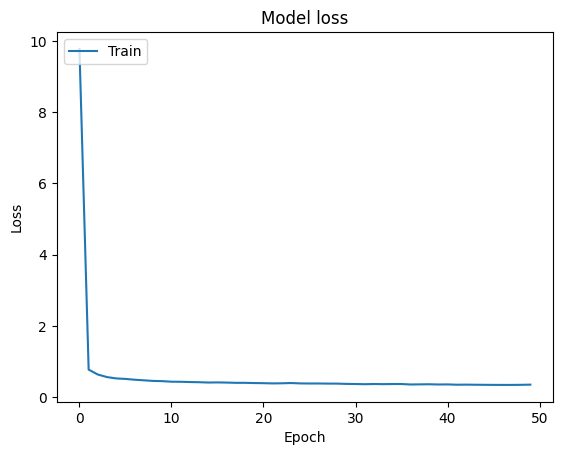

[130]


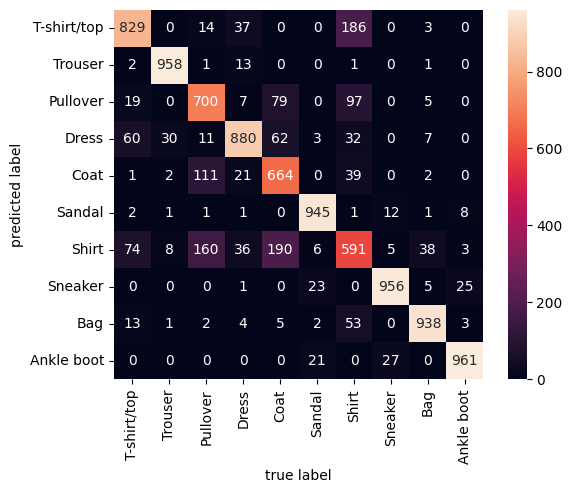

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.70      0.73      1000
           3       0.81      0.88      0.84      1000
           4       0.79      0.66      0.72      1000
           5       0.97      0.94      0.96      1000
           6       0.53      0.59      0.56      1000
           7       0.95      0.96      0.95      1000
           8       0.92      0.94      0.93      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



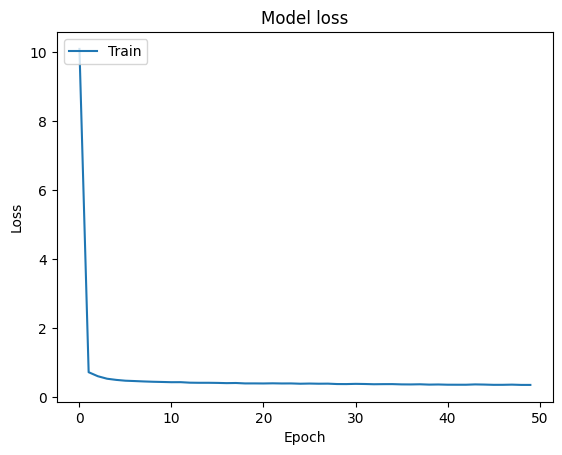

[140]


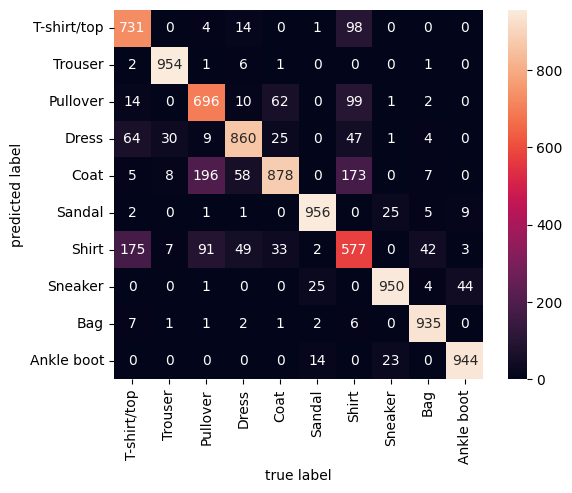

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.79      0.70      0.74      1000
           3       0.83      0.86      0.84      1000
           4       0.66      0.88      0.76      1000
           5       0.96      0.96      0.96      1000
           6       0.59      0.58      0.58      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.94      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



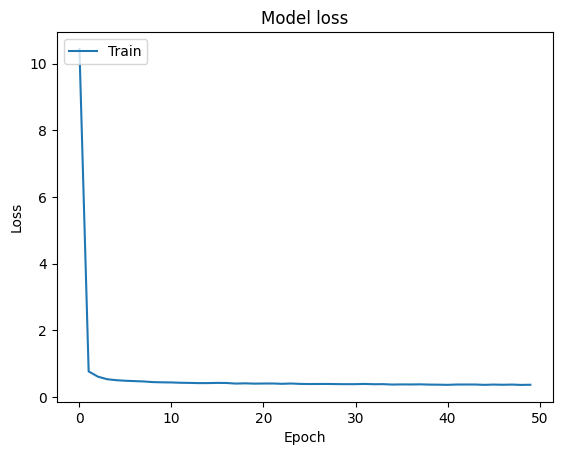

[150]


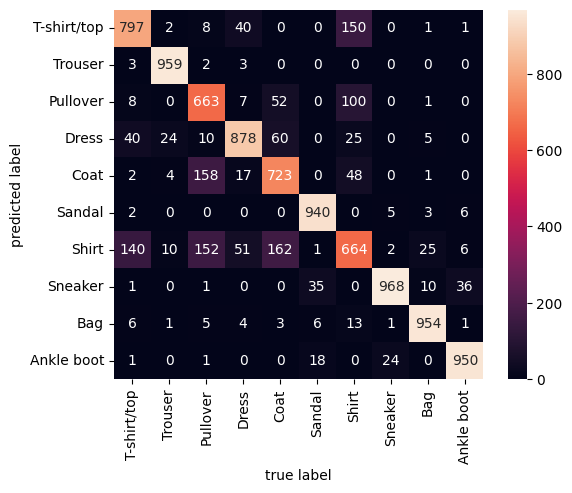

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.66      0.72      1000
           3       0.84      0.88      0.86      1000
           4       0.76      0.72      0.74      1000
           5       0.98      0.94      0.96      1000
           6       0.55      0.66      0.60      1000
           7       0.92      0.97      0.94      1000
           8       0.96      0.95      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



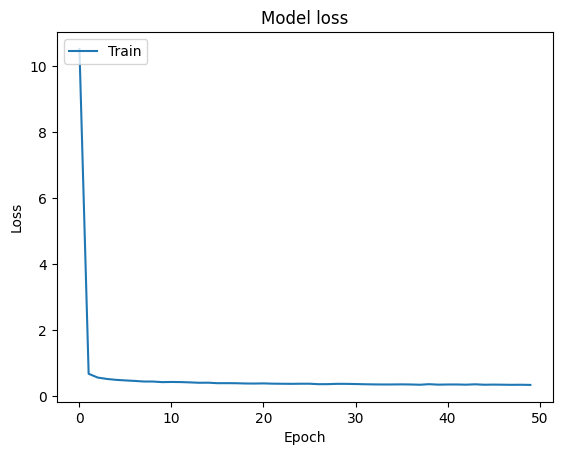

[160]


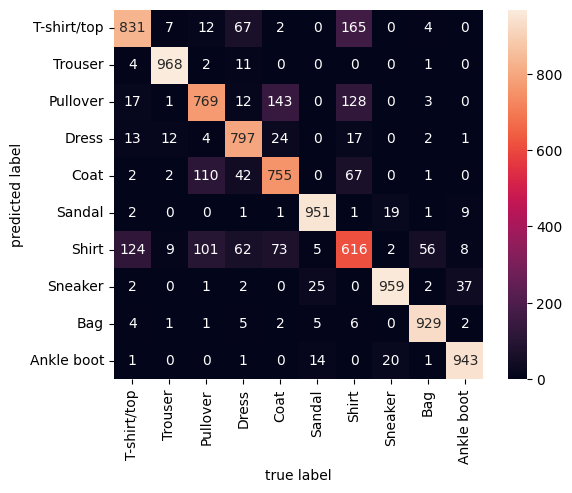

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1000
           1       0.98      0.97      0.97      1000
           2       0.72      0.77      0.74      1000
           3       0.92      0.80      0.85      1000
           4       0.77      0.76      0.76      1000
           5       0.97      0.95      0.96      1000
           6       0.58      0.62      0.60      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.93      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



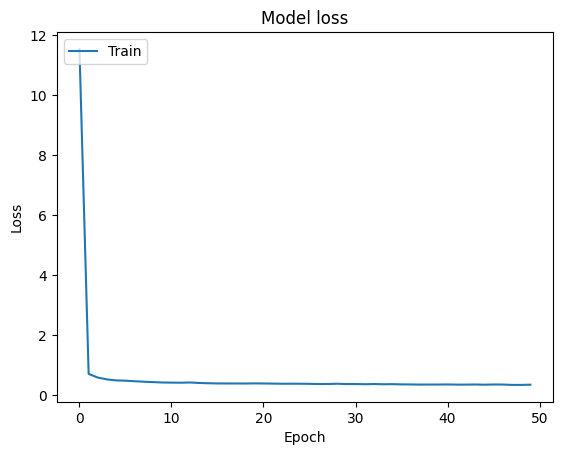

In [83]:
params = {
    'labels': ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],
    'epochs': 50,
    'batch_size': 128,
    'input': 784,
    'output': 10,
    'verbose': 0
}

models = [[90],[100],[110],[120],[128],[130],[140],[150],[160]]

for model in models:
    params['layers'] = model
    print(model)
    build_and_evaluate_model(params)

It is interesting to see that where it got confused is between similar items. The shirt is mainly confused with T-shirt/top, pullover, coat, and dress. All of these are, for the most part, the same shape and reflects in the precision and recall values; they are the lowest across the board. On the other hand, the item with the best scores is the most unique out of the list, trousers.